In [2]:
from sklearn.datasets import load_sample_image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

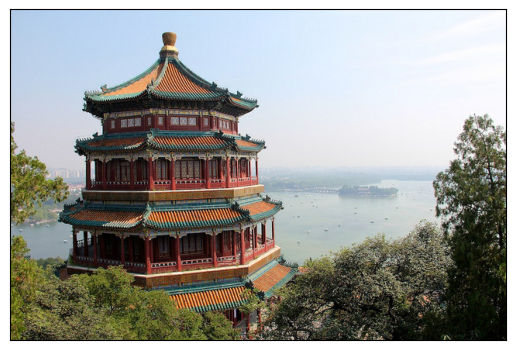

In [3]:


china = load_sample_image("china.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china)

plt.show()

In [4]:
china.shape

(427, 640, 3)

In [5]:
china[1][1]

array([173, 200, 230], dtype=uint8)

In [6]:
data = china / 255.0
data = data.reshape(427 * 640, 3)
data.shape  

(273280, 3)

In [7]:
data[1]

array([0.68235294, 0.78823529, 0.90588235])

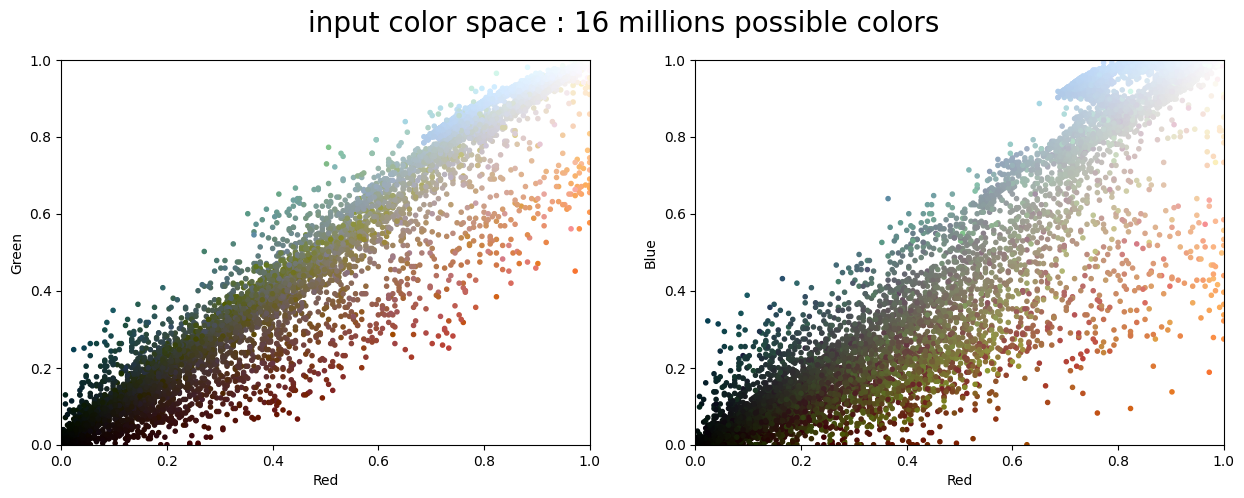

In [15]:
def plot_pixels(data, title, colors = None, N=10000):
    if colors is None:
        colors = data

    # Chose a random subset
    rng = np.random.RandomState(16)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(15, 5))
    ax[0].scatter(R, G , color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0,1), ylim=(0,1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20)


plot_pixels(data=data, title="input color space : 16 millions possible colors")
                            

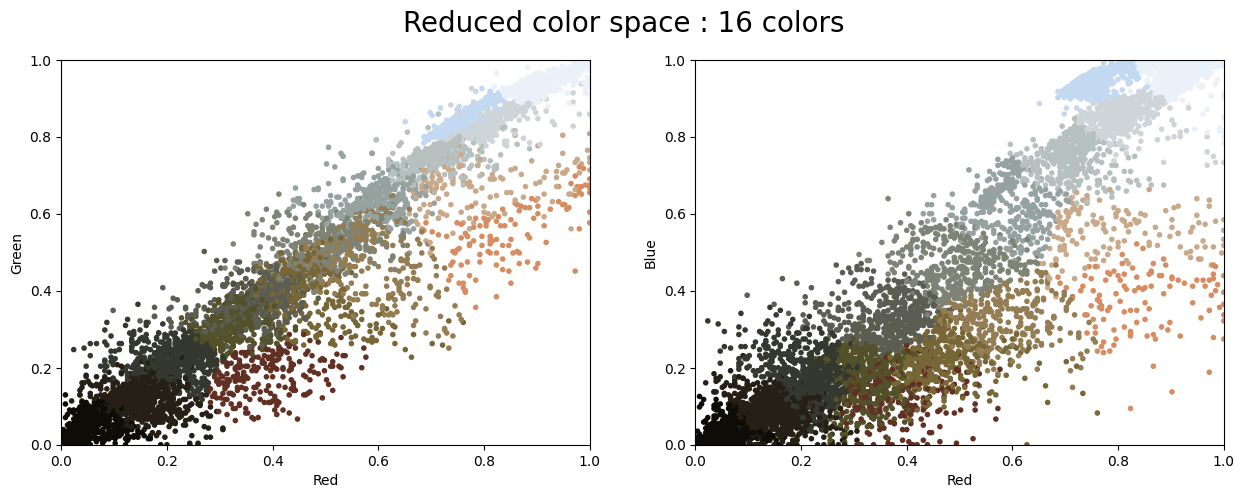

In [16]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data=data, colors=new_colors, title='Reduced color space : 16 colors')

In [10]:
new_colors.shape

(273280, 3)

In [11]:
data.shape

(273280, 3)

In [12]:
china_recolored = new_colors.reshape(china.shape)

In [13]:
china_recolored.shape

(427, 640, 3)

Text(0.5, 1.0, '16-color Image')

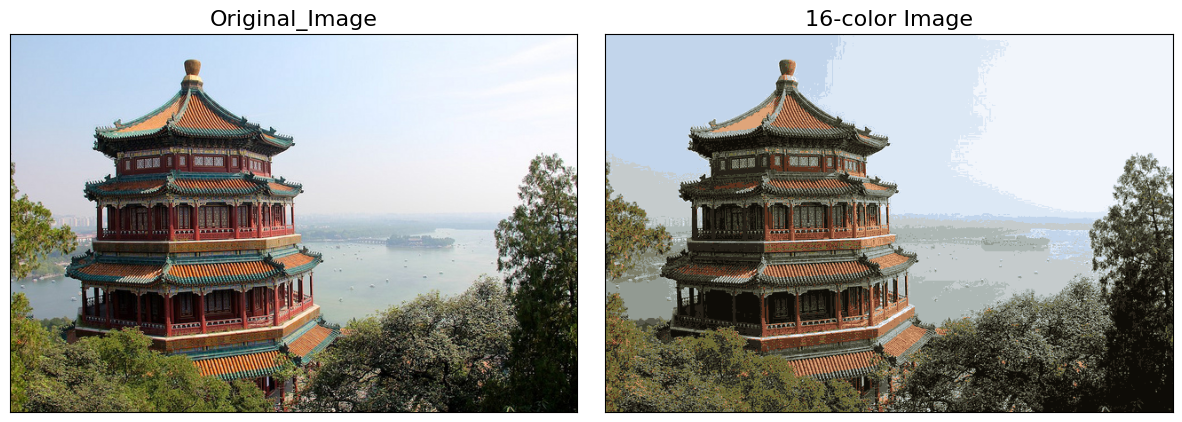

In [14]:
fig, ax = plt.subplots(1,2 ,figsize=(15,5), subplot_kw=dict(xticks=[], yticks=[]))

fig.subplots_adjust(wspace=0.05)

ax[0].imshow(china)
ax[0].set_title('Original_Image', size=16)
ax[1].imshow(china_recolored)
ax[1].set_title('16-color Image', size=16)


